In [1]:
from generate_fragments import generate_fragments
from Multi_Nuclei_Segmentation import create_images, optimise_fragments, global_solution, multi_segmentation, segment_EV
from Single_nuclei_segmentation import Solv
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.ndimage import gaussian_filter

from cvxopt import matrix

from skimage.measure import regionprops
import numpy as np

4it [00:00, 76.76it/s]


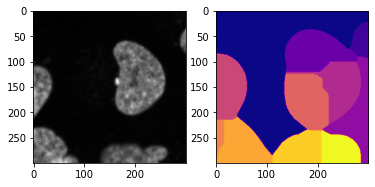

In [2]:
image = plt.imread('../images/dna-images/gnf/dna-0.png')[200:500, 200:500 ,0]
Omega,S = generate_fragments(image,16,0.01,20,2,100, background = 60)

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(image,cmap='gray')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(Omega,cmap='plasma')

In [3]:
Z = list(S)
gauss_img = gaussian_filter(image, 16)
ListOfImages = create_images(gauss_img, Omega, Z)

In [4]:
theta, f = optimise_fragments(ListOfImages)

[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-3)]: Done   6 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-3)]: Done  13 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-3)]: Done  20 out of  28 | elapsed:   23.0s remaining:    9.2s
[Parallel(n_jobs=-3)]: Done  23 out of  28 | elapsed:   25.9s remaining:    5.6s
[Parallel(n_jobs=-3)]: Done  26 out of  28 | elapsed:   28.2s remaining:    2.1s
[Parallel(n_jobs=-3)]: Done  28 out of  28 | elapsed:   31.5s finished


In [5]:
seg = multi_segmentation(image, Omega, list(S), f, theta)

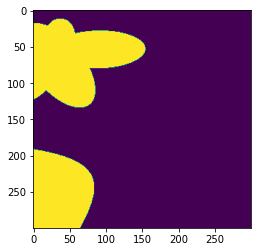

In [6]:
plt.imshow(seg)